In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [8]:
def show_mutual_info(Data_set, year_data):

    All_players_dataSet = Data_set.copy()

    All_players_dataSet = All_players_dataSet.drop(columns=All_players_dataSet.columns[All_players_dataSet.columns.str.contains('Unnamed:')])
    All_players_dataSet.reset_index(drop=True, inplace=True)
    
    All_players_dataSet.fillna(0, inplace=True)
    All_players_dataSet.replace('', 0, inplace=True)
    All_players_dataSet.replace('--', 0, inplace=True)
    
    # check if any NaN,empty Strings exists in the dataframe
    any_missing_values = All_players_dataSet.isna().any().any()
    any_empty_values = (All_players_dataSet.applymap(lambda x: x == '')).any().any()
    if any_missing_values or any_empty_values:
        print("DataFrame contains missing values or empty strings/spaces.")
    else:
        print("DataFrame does not contain missing values or empty strings/spaces.")

    # Drop unwanted columns
    columns_to_drop = ['First_votes', 'Season', 'Year', 'Player_name', 'won_dpoy_last_season',
                   'Max_points', 'Tm', 'Lg', 'Pos', 'Rank', 'Arena_misc',
                   'Attendance_misc','FG', 'FGA', 'FG%', '3P', '3PA',
                   '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'AST',
                   'PTS', 'FG_100_poss', 'FGA_100_poss', 'FG%_100_poss',
                   '3P_100_poss', '3PA_100_poss', '3P%_100_poss', '2P_100_poss', '2PA_100_poss',
                   '2P%_100_poss', 'FT_100_poss', 'FTA_100_poss', 'FT%_100_poss', 'ORB_100_poss', 'AST_100_poss',
                   'PTS_100_poss', 'ORtg_100_poss', '3PAr_advanced', 'FTr_advanced', 'ORB%_advanced',
                   'OWS_advanced', 'OBPM_advanced', 'AST%_advanced', 'USG%_advanced', 'G_team', 'MP_team', 'FG_team', 'FGA_team',
                   'FG%_team', '3P_team', '3PA_team', '3P%_team', '2P_team', '2PA_team', '2P%_team',
                   'FT_team', 'FTA_team', 'FT%_team', 'ORB_team', 'G_opponent', 'MP_opponent',
                   'FG_opponent', 'STL_opponent', 'BLK_opponent','DRB_opponent', 'TOV_opponent', 'PF_opponent',
                   'PTS_opponent', 'ORtg_misc', 'FTr_misc', '3PAr_misc', 'eFG%_misc', 'ORB%_misc',
                   'FT/FGA_misc', 'eFG%.1_misc', 'FT/FGA.1_misc', 'ORPM_espn', 'raptor_offense_raptor',
                   'war_playoffs_raptor', 'predator_offense_raptor','FTr_misc','FT/FGA.1_misc','BLK_opponent',
                   '3P_team','FT/FGA.1_misc', 'PTS_team','TS%_advanced','L_nba','TOV%_advanced']

    All_players_dataSet['won_dpoy_last_season'] = All_players_dataSet['won_dpoy_last_season'].astype(int)
    
    ## Drop the specified columns
    All_players_dataSet.drop(columns=columns_to_drop, inplace=True)
    
    ## seperating our dataFrame
    Y = All_players_dataSet['Points_won']  # Target
    X = All_players_dataSet.drop('Points_won', axis=1)  # Features
    
    
    # Calculate Mutual Information scores for each feature
    mi_scores = mutual_info_classif(X, Y)
    
    # Create a Pandas DataFrame with feature names and MI scores
    mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
    
    # Sort features based on MI scores
    mi_df = mi_df.sort_values(by='MI_Score')
    mi_df = mi_df.drop(columns=mi_df.columns[mi_df.columns.str.contains('Unnamed')])

    # Sort features based on MI scores in descending order
    sorted_mi_df = mi_df.sort_values(by='MI_Score', ascending=False)
    
    # Take only the top 100 features
    top_100_features_df = sorted_mi_df.head(100)

    top_100_features_df.shape[1]
    
    top_100_features_df.reset_index(drop=True, inplace=True)
    top_100_features_df.to_csv('top_N_features_Mutual_Information_Score{}.csv'.format(year_data))
    

    # Plot the MI scores
    plt.figure(figsize=(15, 25))
    plt.barh(range(mi_df.shape[0]), mi_df['MI_Score'], align="center")
    plt.yticks(range(mi_df.shape[0]), mi_df['Feature']) 
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Features')
    plt.title('Mutual Information Scores of Features')
    ##plt.savefig('mutual_information_plot.png')
    plt.show()

    

C:\Users\Abdou\AppData\Local\Temp\ipykernel_11748\3182296534.py:2: DtypeWarning: Columns (154,155) have mixed types. Specify dtype option on import or set low_memory=False.
  all_players_w_add_sorted = pd.read_csv("all_players_w_add_sorted.csv")


DataFrame does not contain missing values or empty strings/spaces.


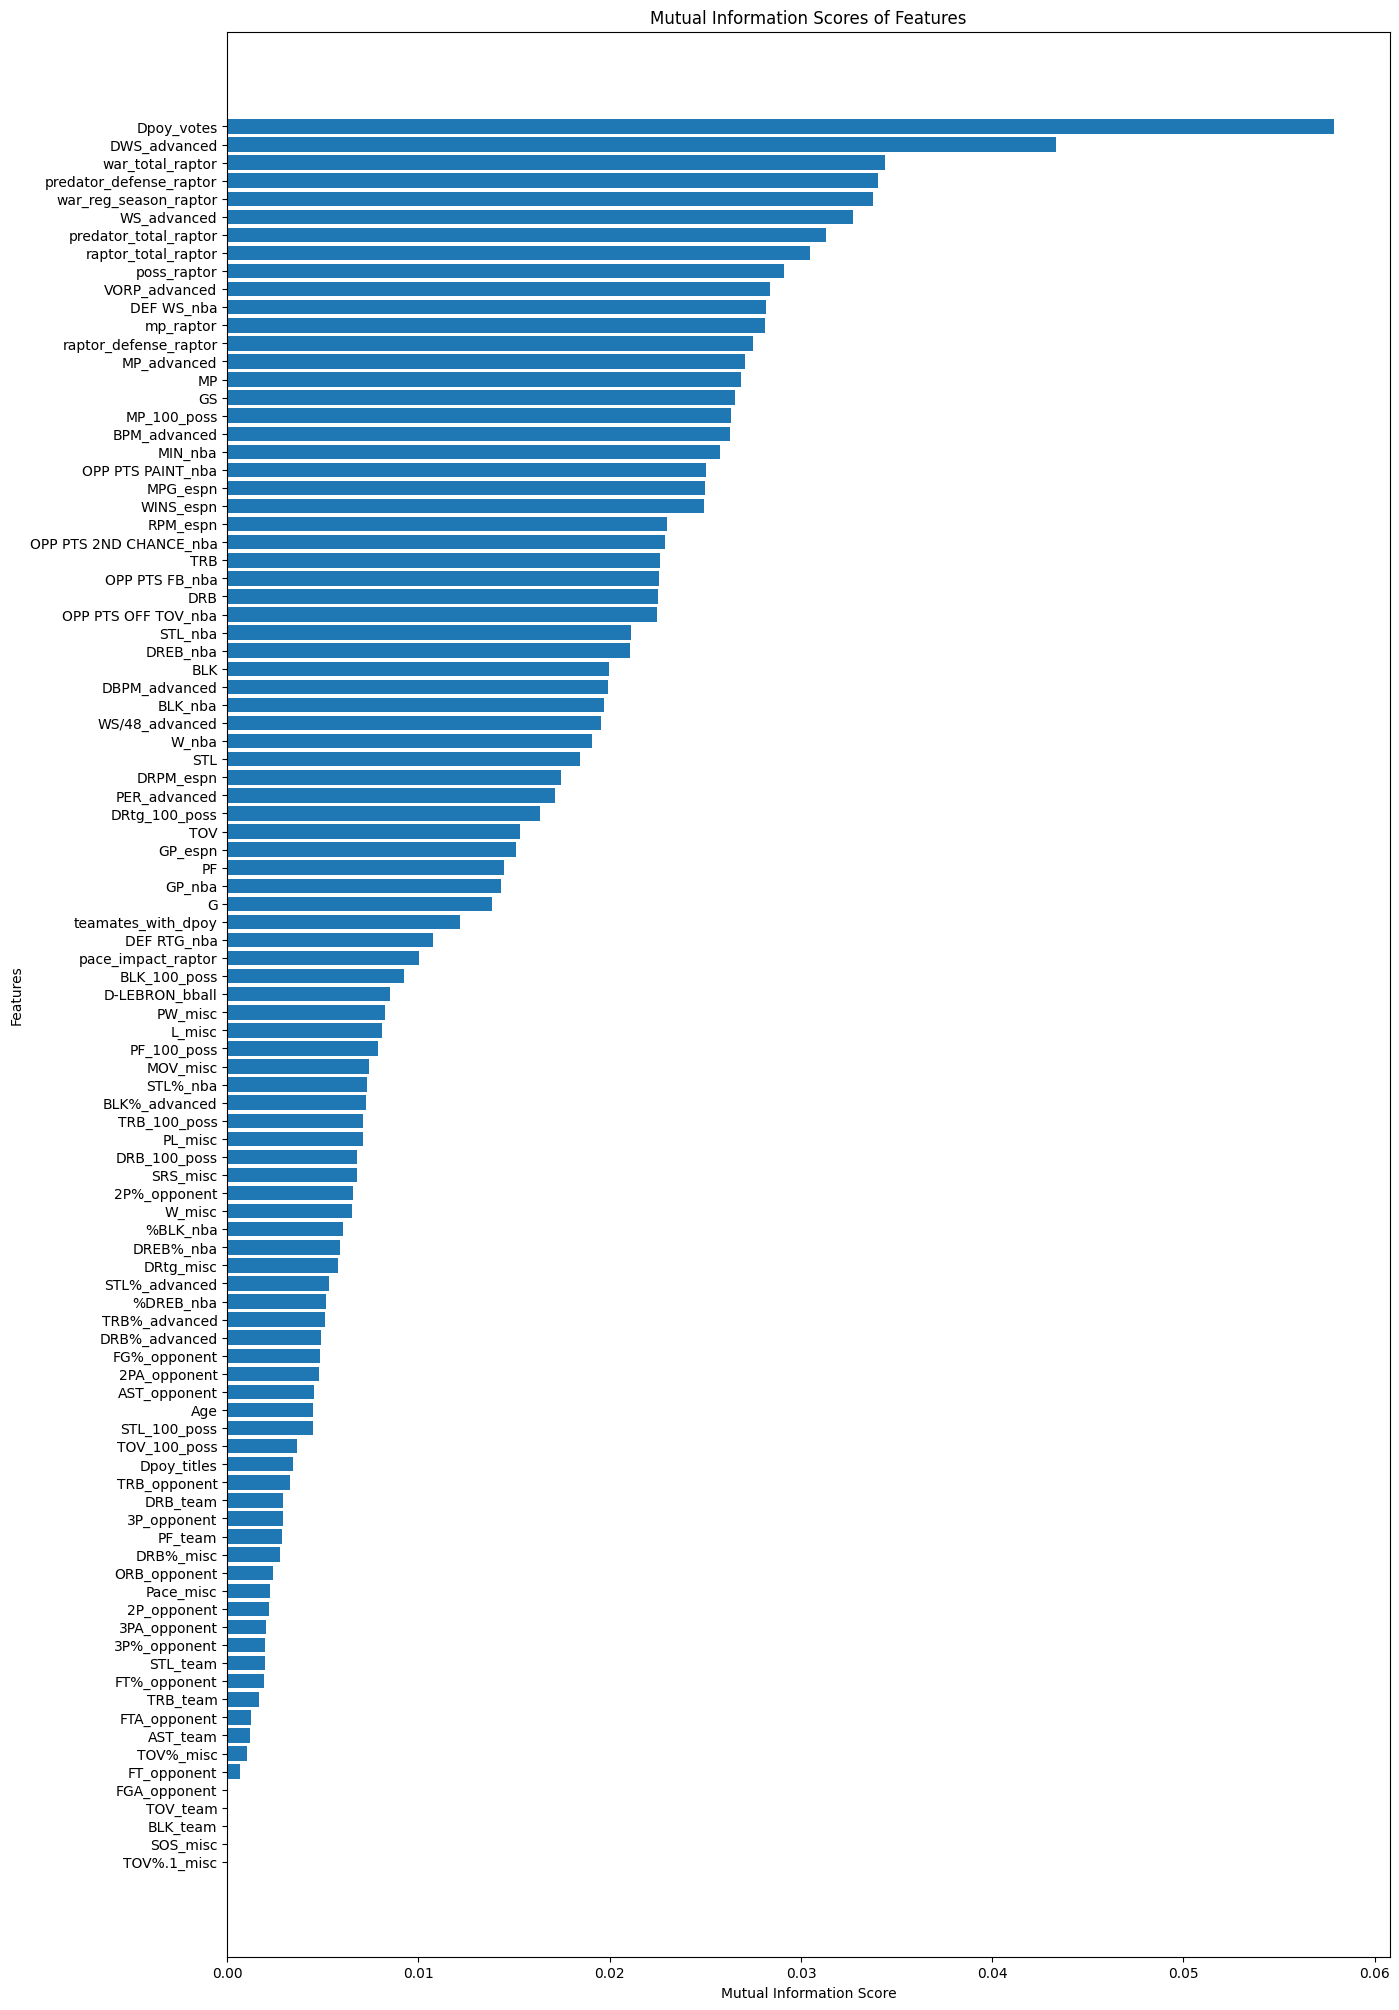

In [9]:
## All players dataFrame
all_players_w_add_sorted = pd.read_csv("all_players_w_add_sorted.csv")
show_mutual_info(all_players_w_add_sorted,"All")

In [10]:
all_players_w_add_sorted = pd.read_csv("all_players_w_add_sorted.csv")

# covert to intger
all_players_w_add_sorted['Year'] = pd.to_numeric(all_players_w_add_sorted['Year'], errors='coerce')

# Create subsets for each 5-year interval
subset_1993_1997 = all_players_w_add_sorted[(all_players_w_add_sorted['Year'] >= 1993) & (all_players_w_add_sorted['Year'] <= 1997)]
subset_1998_2002 = all_players_w_add_sorted[(all_players_w_add_sorted['Year'] >= 1998) & (all_players_w_add_sorted['Year'] <= 2002)]
subset_2003_2007 = all_players_w_add_sorted[(all_players_w_add_sorted['Year'] >= 2003) & (all_players_w_add_sorted['Year'] <= 2007)]
subset_2008_2012 = all_players_w_add_sorted[(all_players_w_add_sorted['Year'] >= 2008) & (all_players_w_add_sorted['Year'] <= 2012)]
subset_2013_2017 = all_players_w_add_sorted[(all_players_w_add_sorted['Year'] >= 2013) & (all_players_w_add_sorted['Year'] <= 2017)]
subset_2018_2023 = all_players_w_add_sorted[(all_players_w_add_sorted['Year'] >= 2018) & (all_players_w_add_sorted['Year'] <= 2023)]

C:\Users\Abdou\AppData\Local\Temp\ipykernel_11748\3088546698.py:1: DtypeWarning: Columns (154,155) have mixed types. Specify dtype option on import or set low_memory=False.
  all_players_w_add_sorted = pd.read_csv("all_players_w_add_sorted.csv")


DataFrame does not contain missing values or empty strings/spaces.


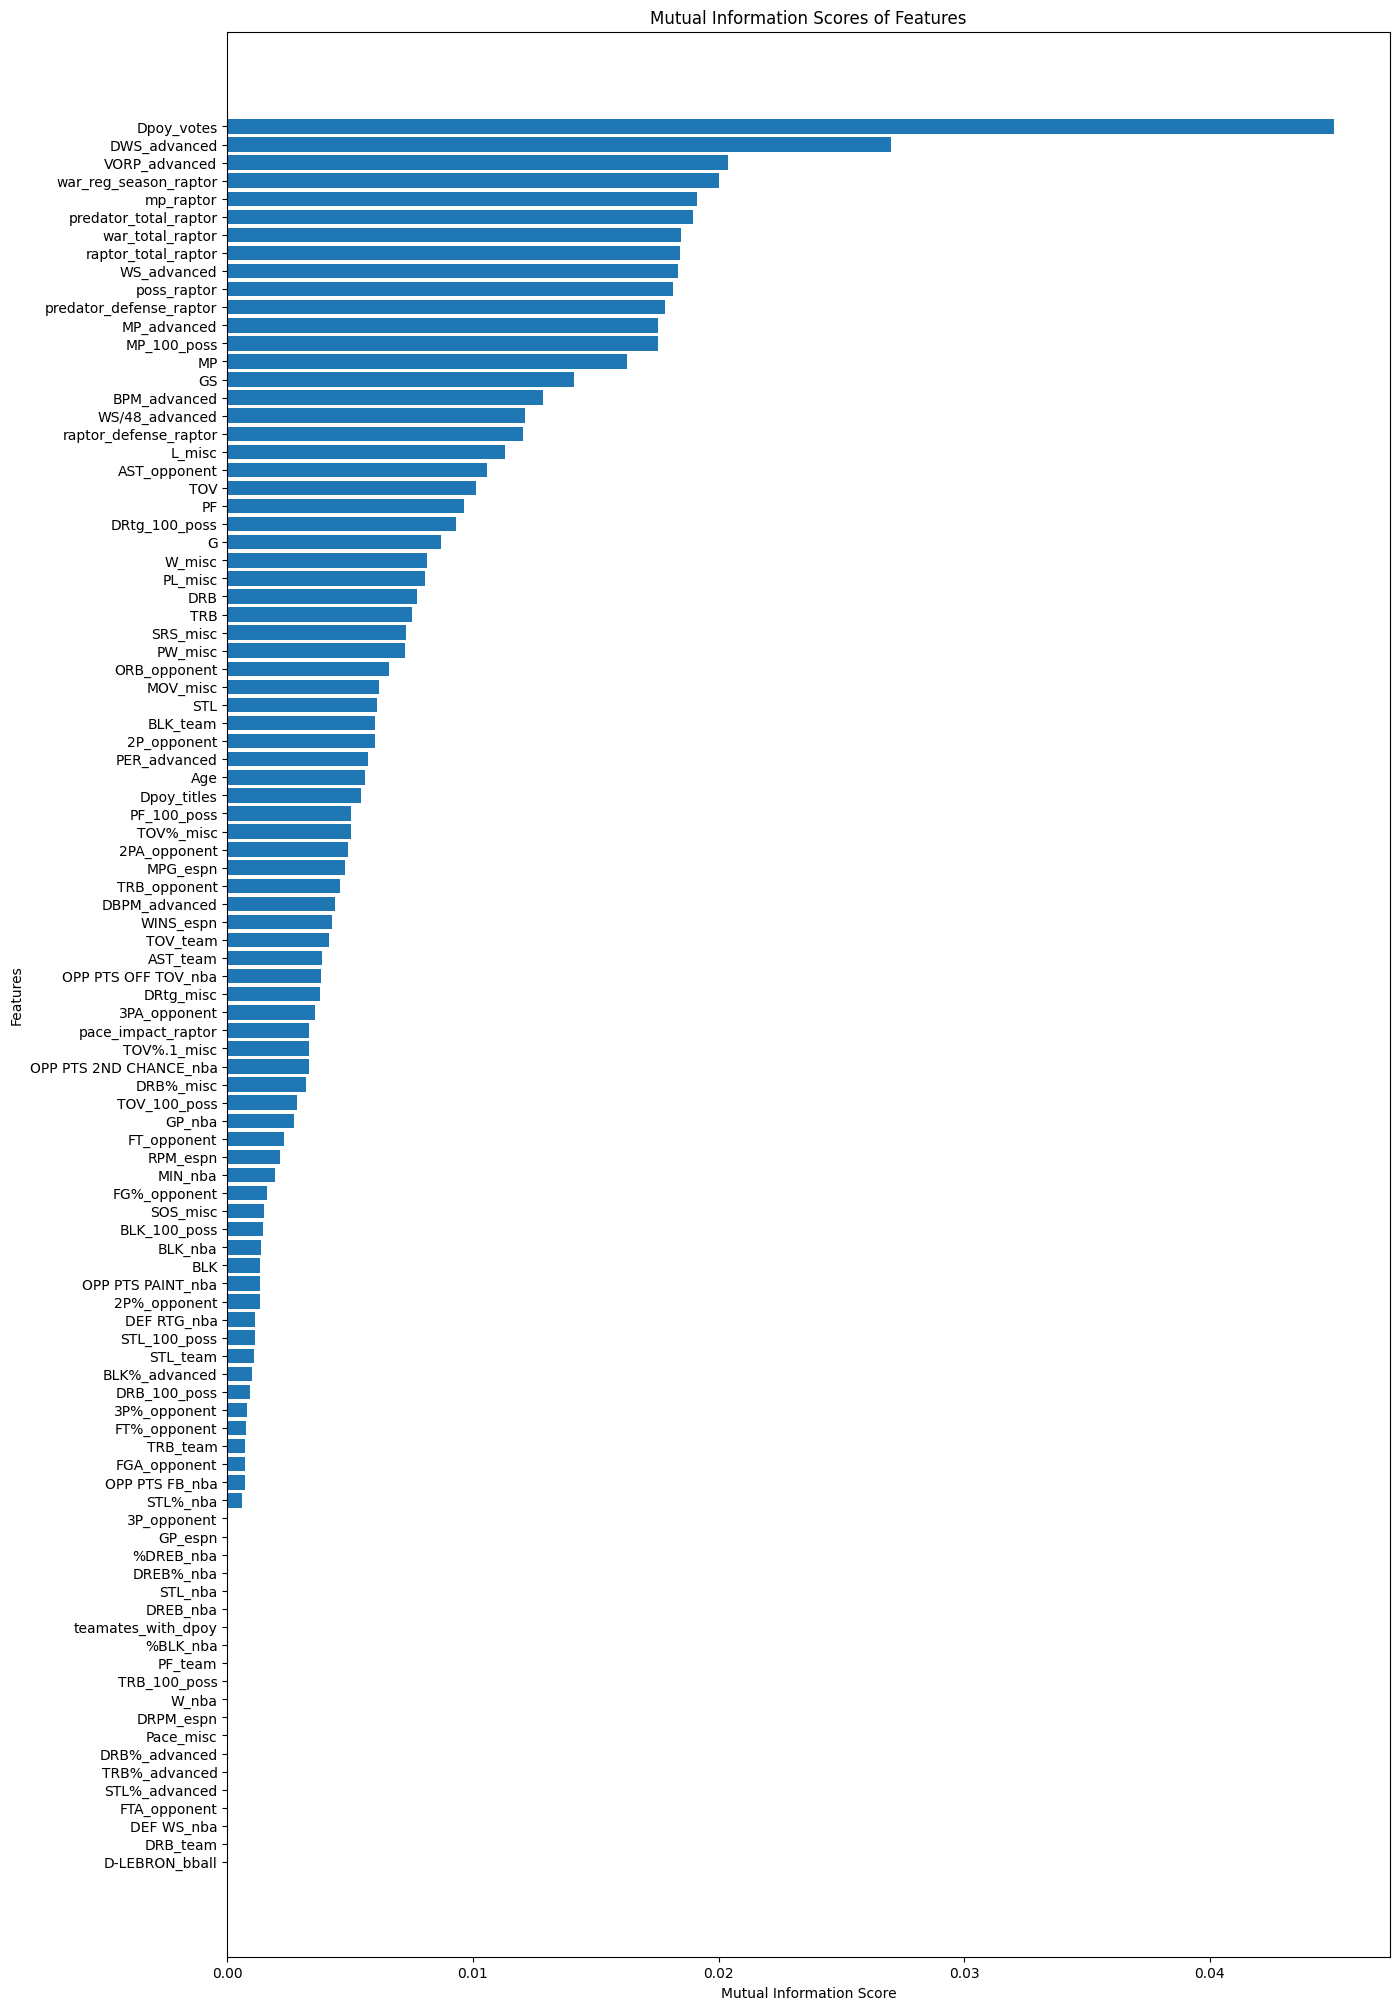

In [11]:
show_mutual_info(subset_1993_1997,"1993_1997")

DataFrame does not contain missing values or empty strings/spaces.


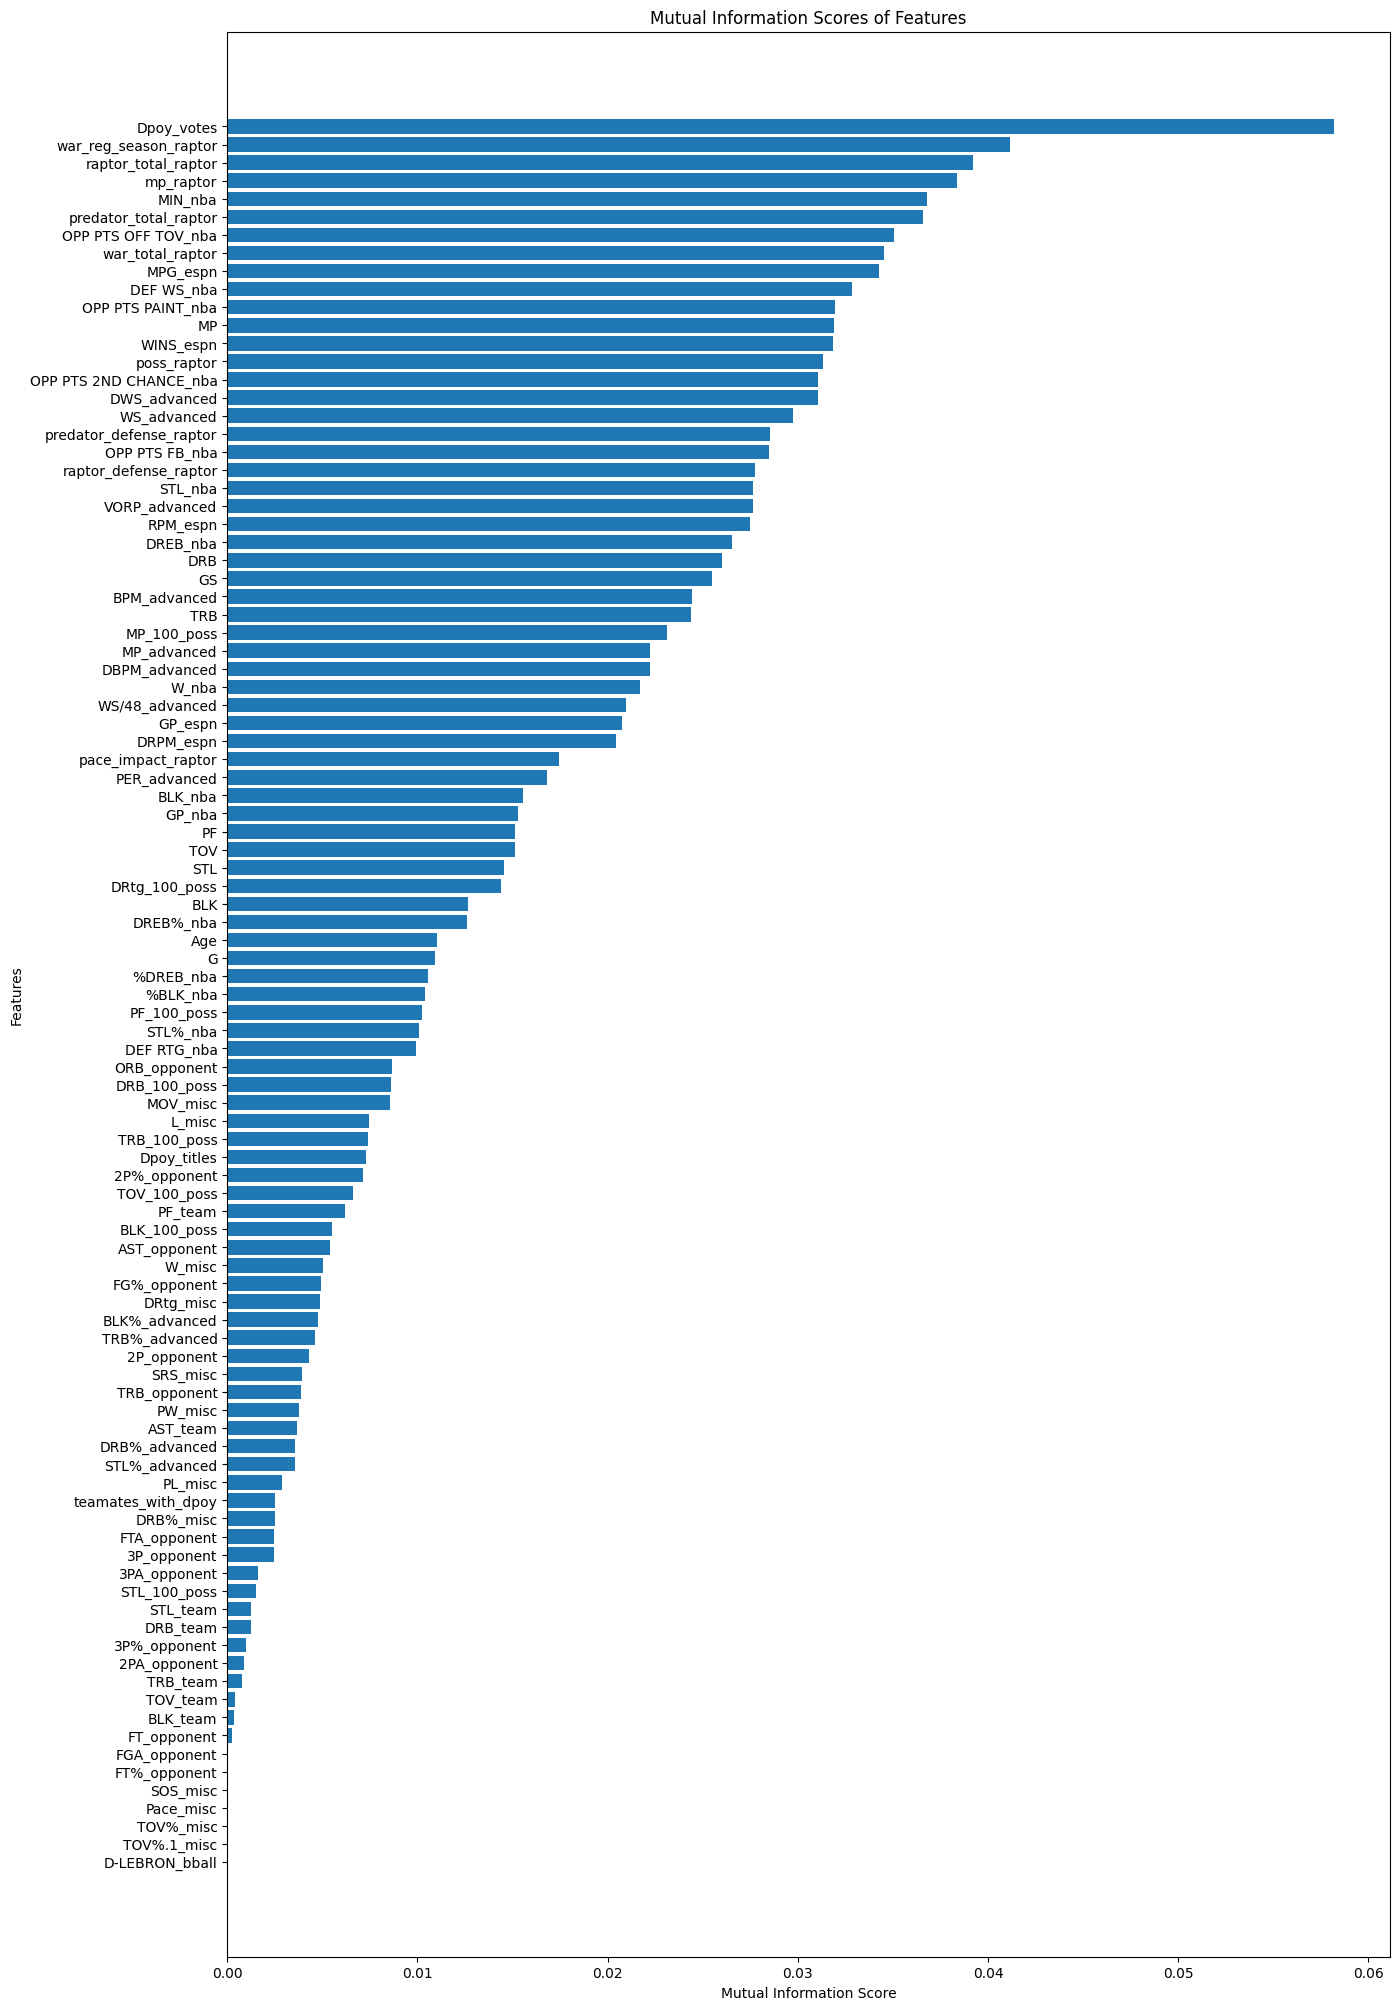

In [12]:
show_mutual_info(subset_1998_2002,"1998_2002")

DataFrame does not contain missing values or empty strings/spaces.


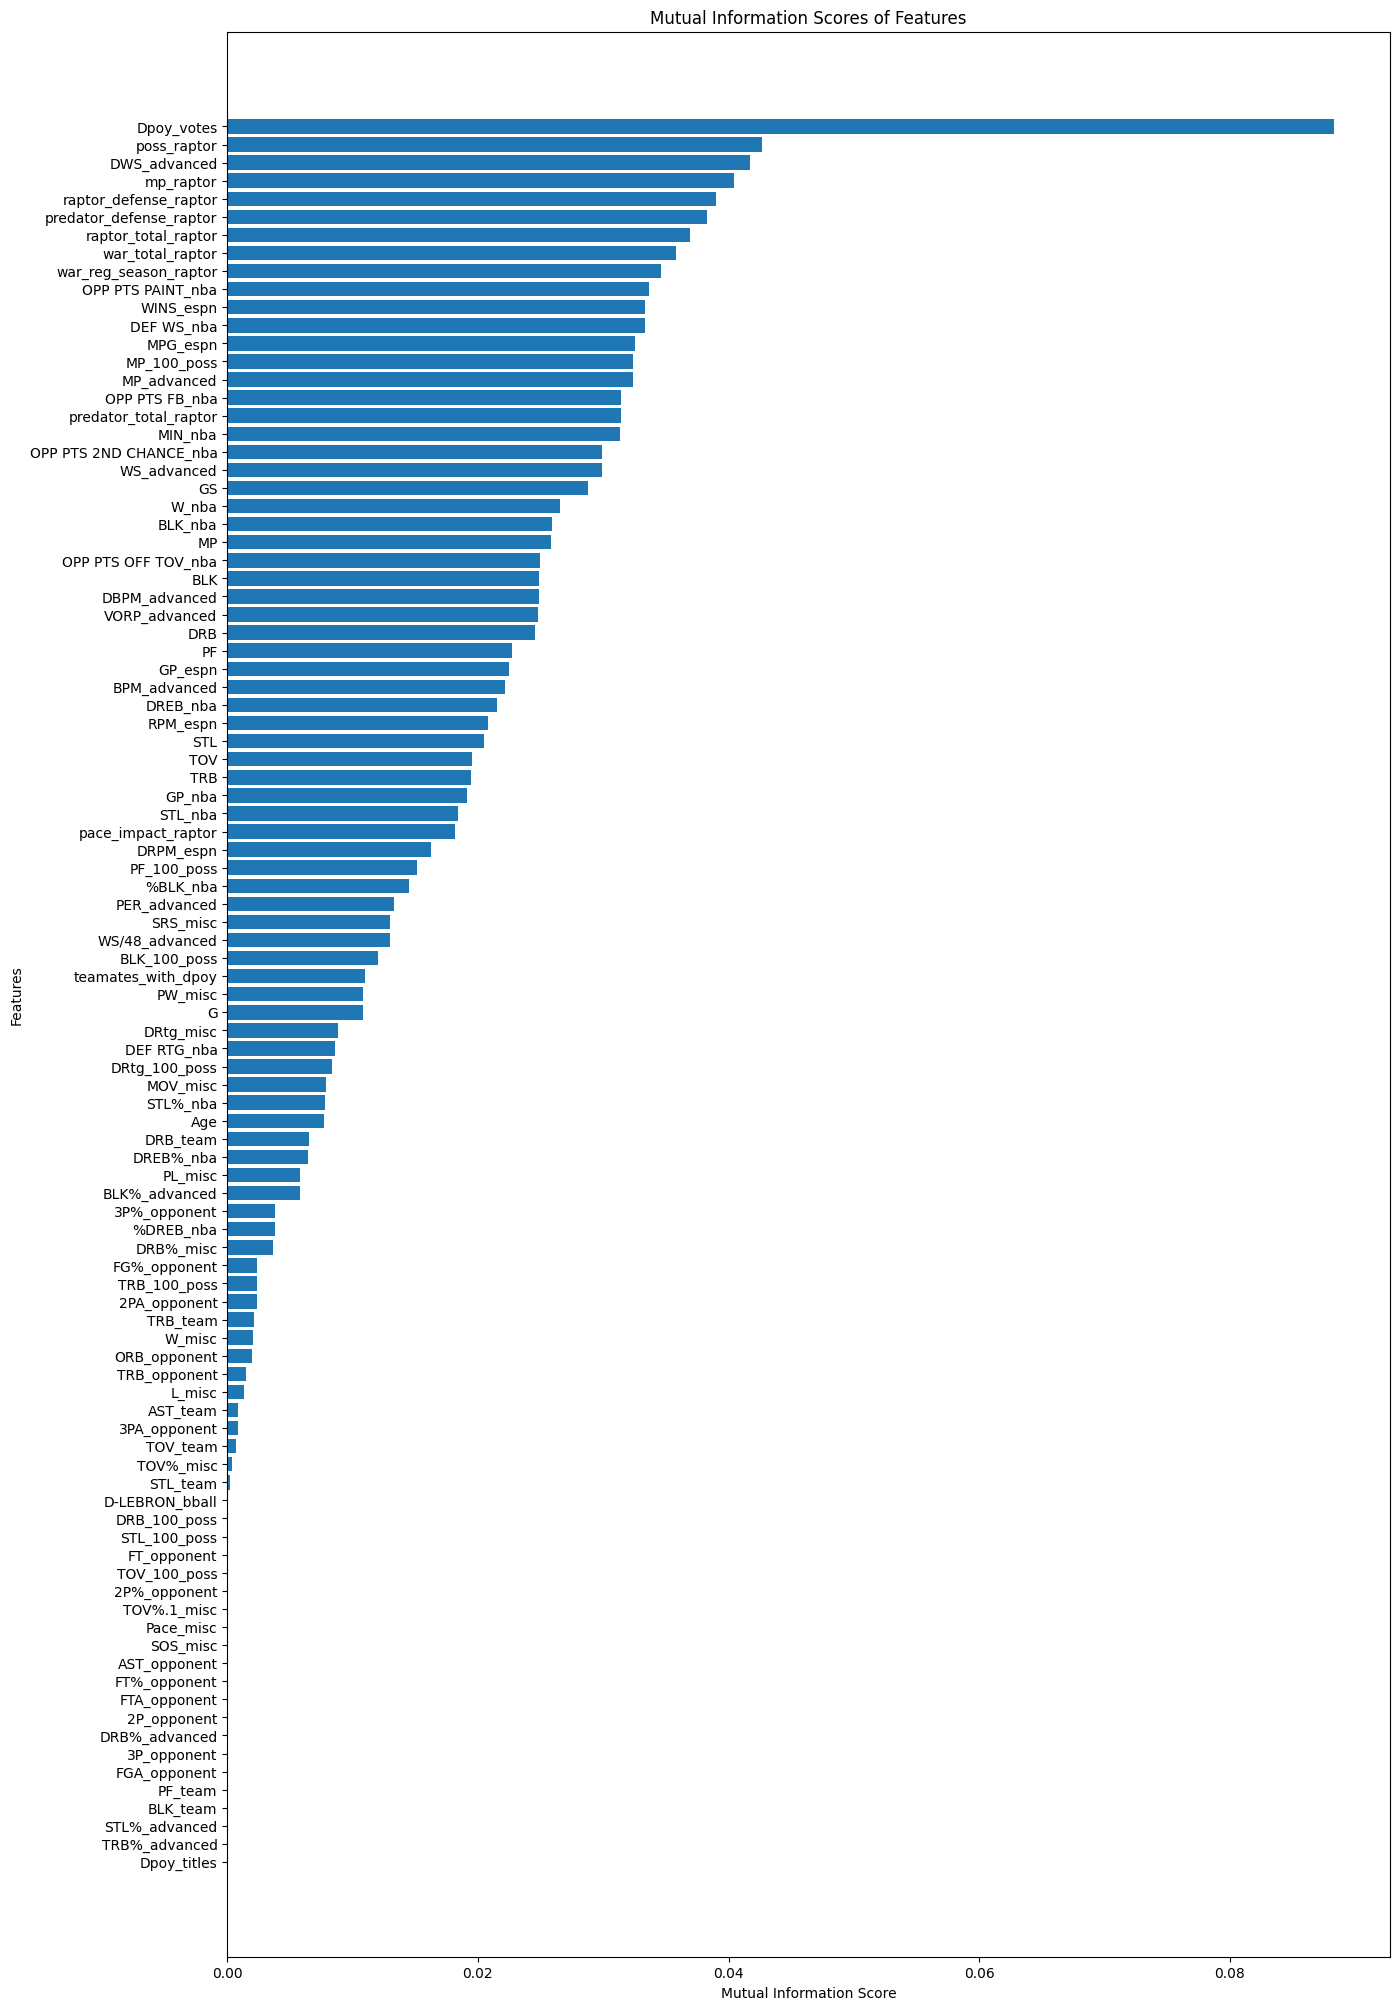

In [13]:
show_mutual_info(subset_2003_2007,"2003_2007")

DataFrame does not contain missing values or empty strings/spaces.


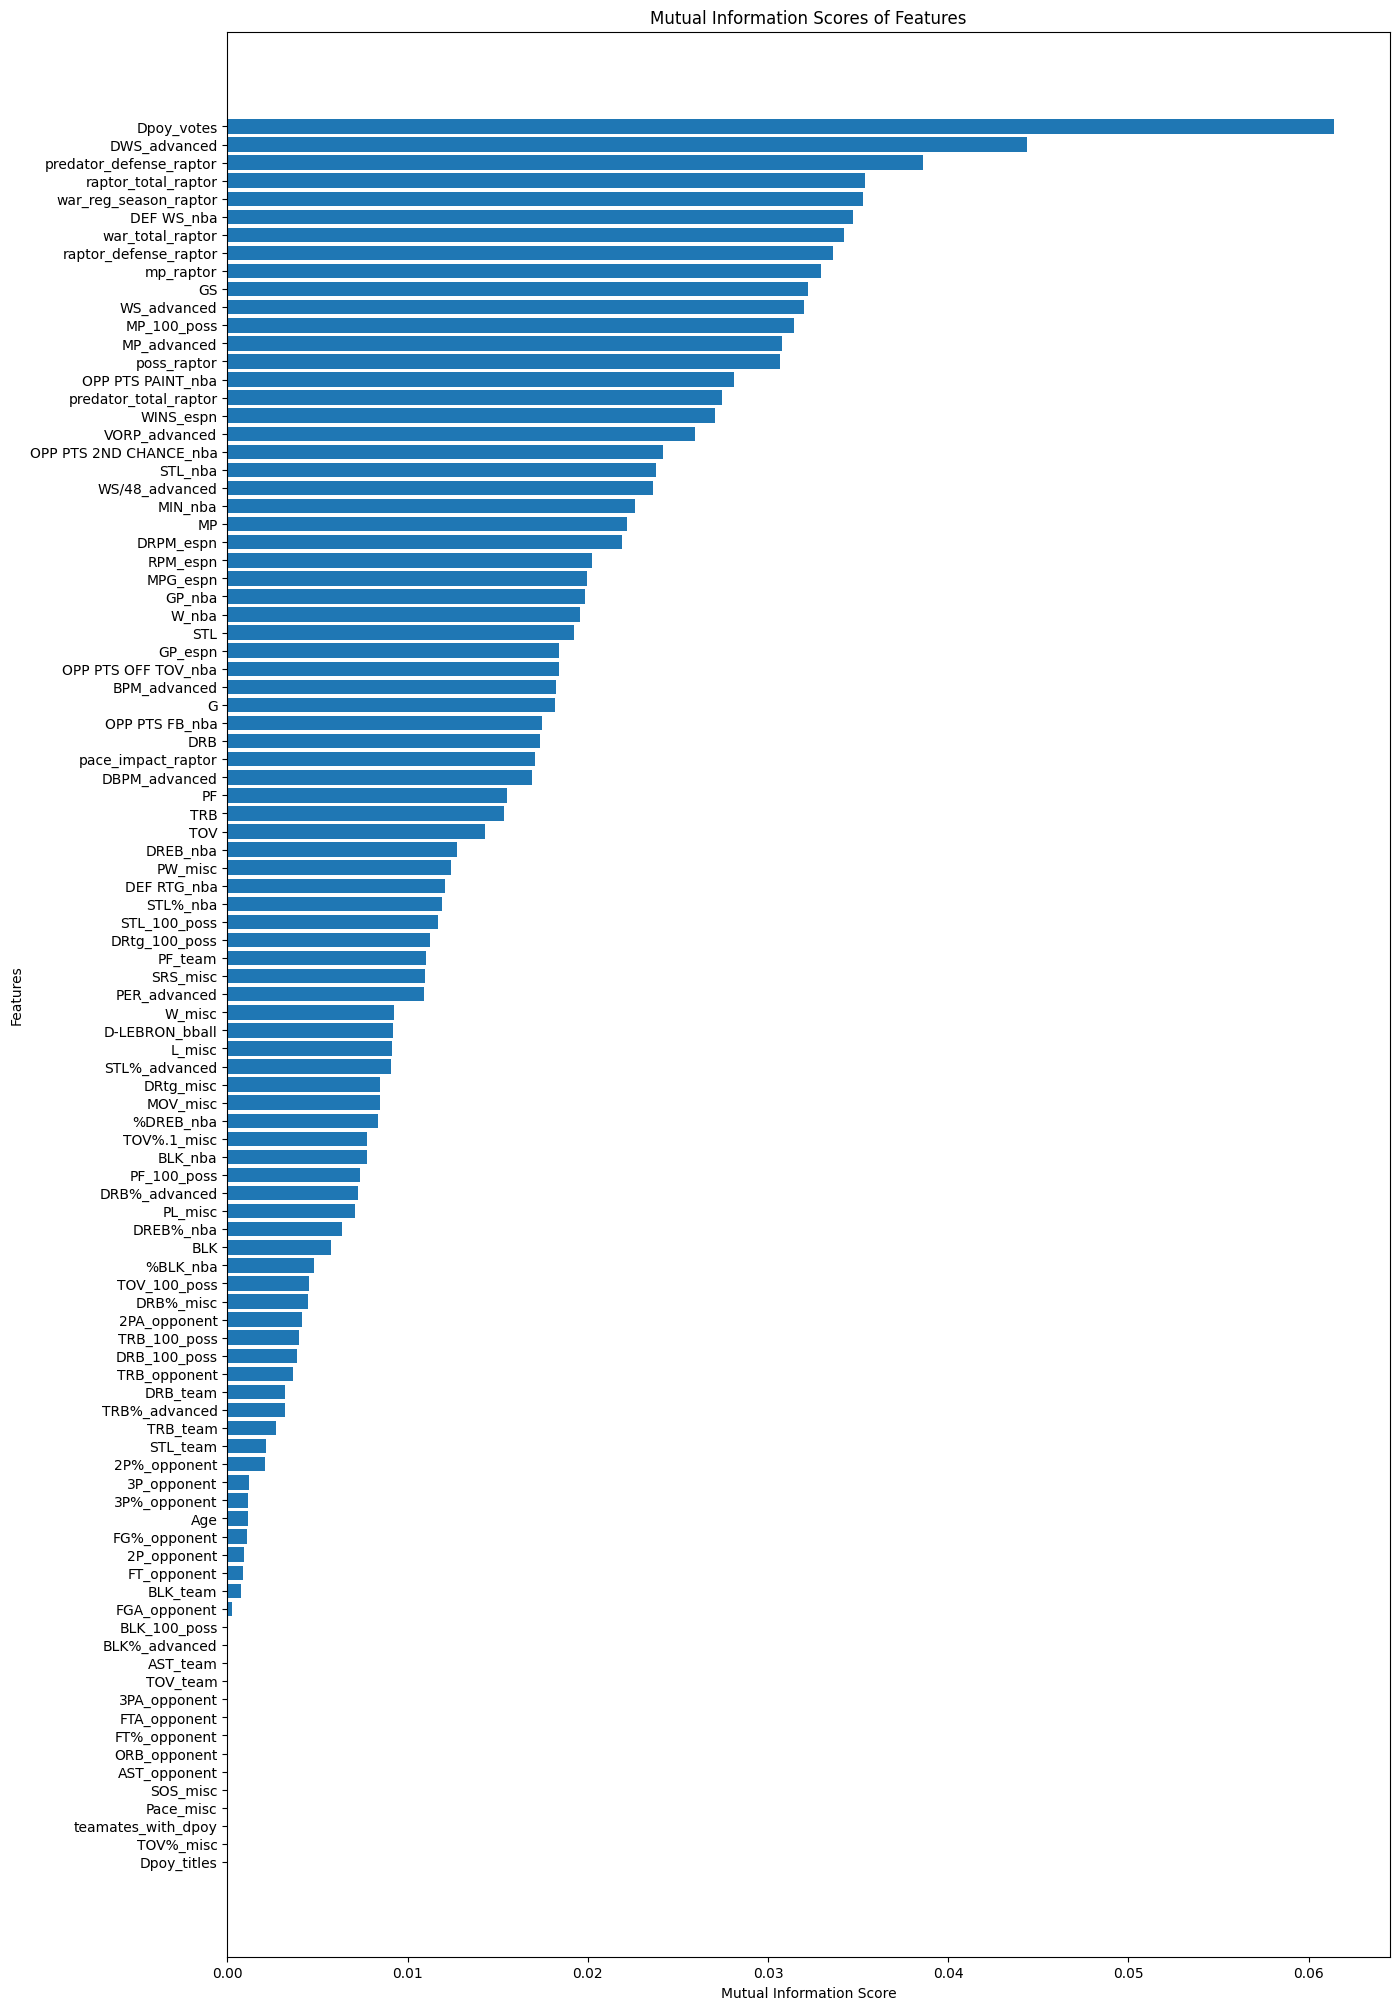

In [14]:
show_mutual_info(subset_2008_2012,"2008_2012")

DataFrame does not contain missing values or empty strings/spaces.


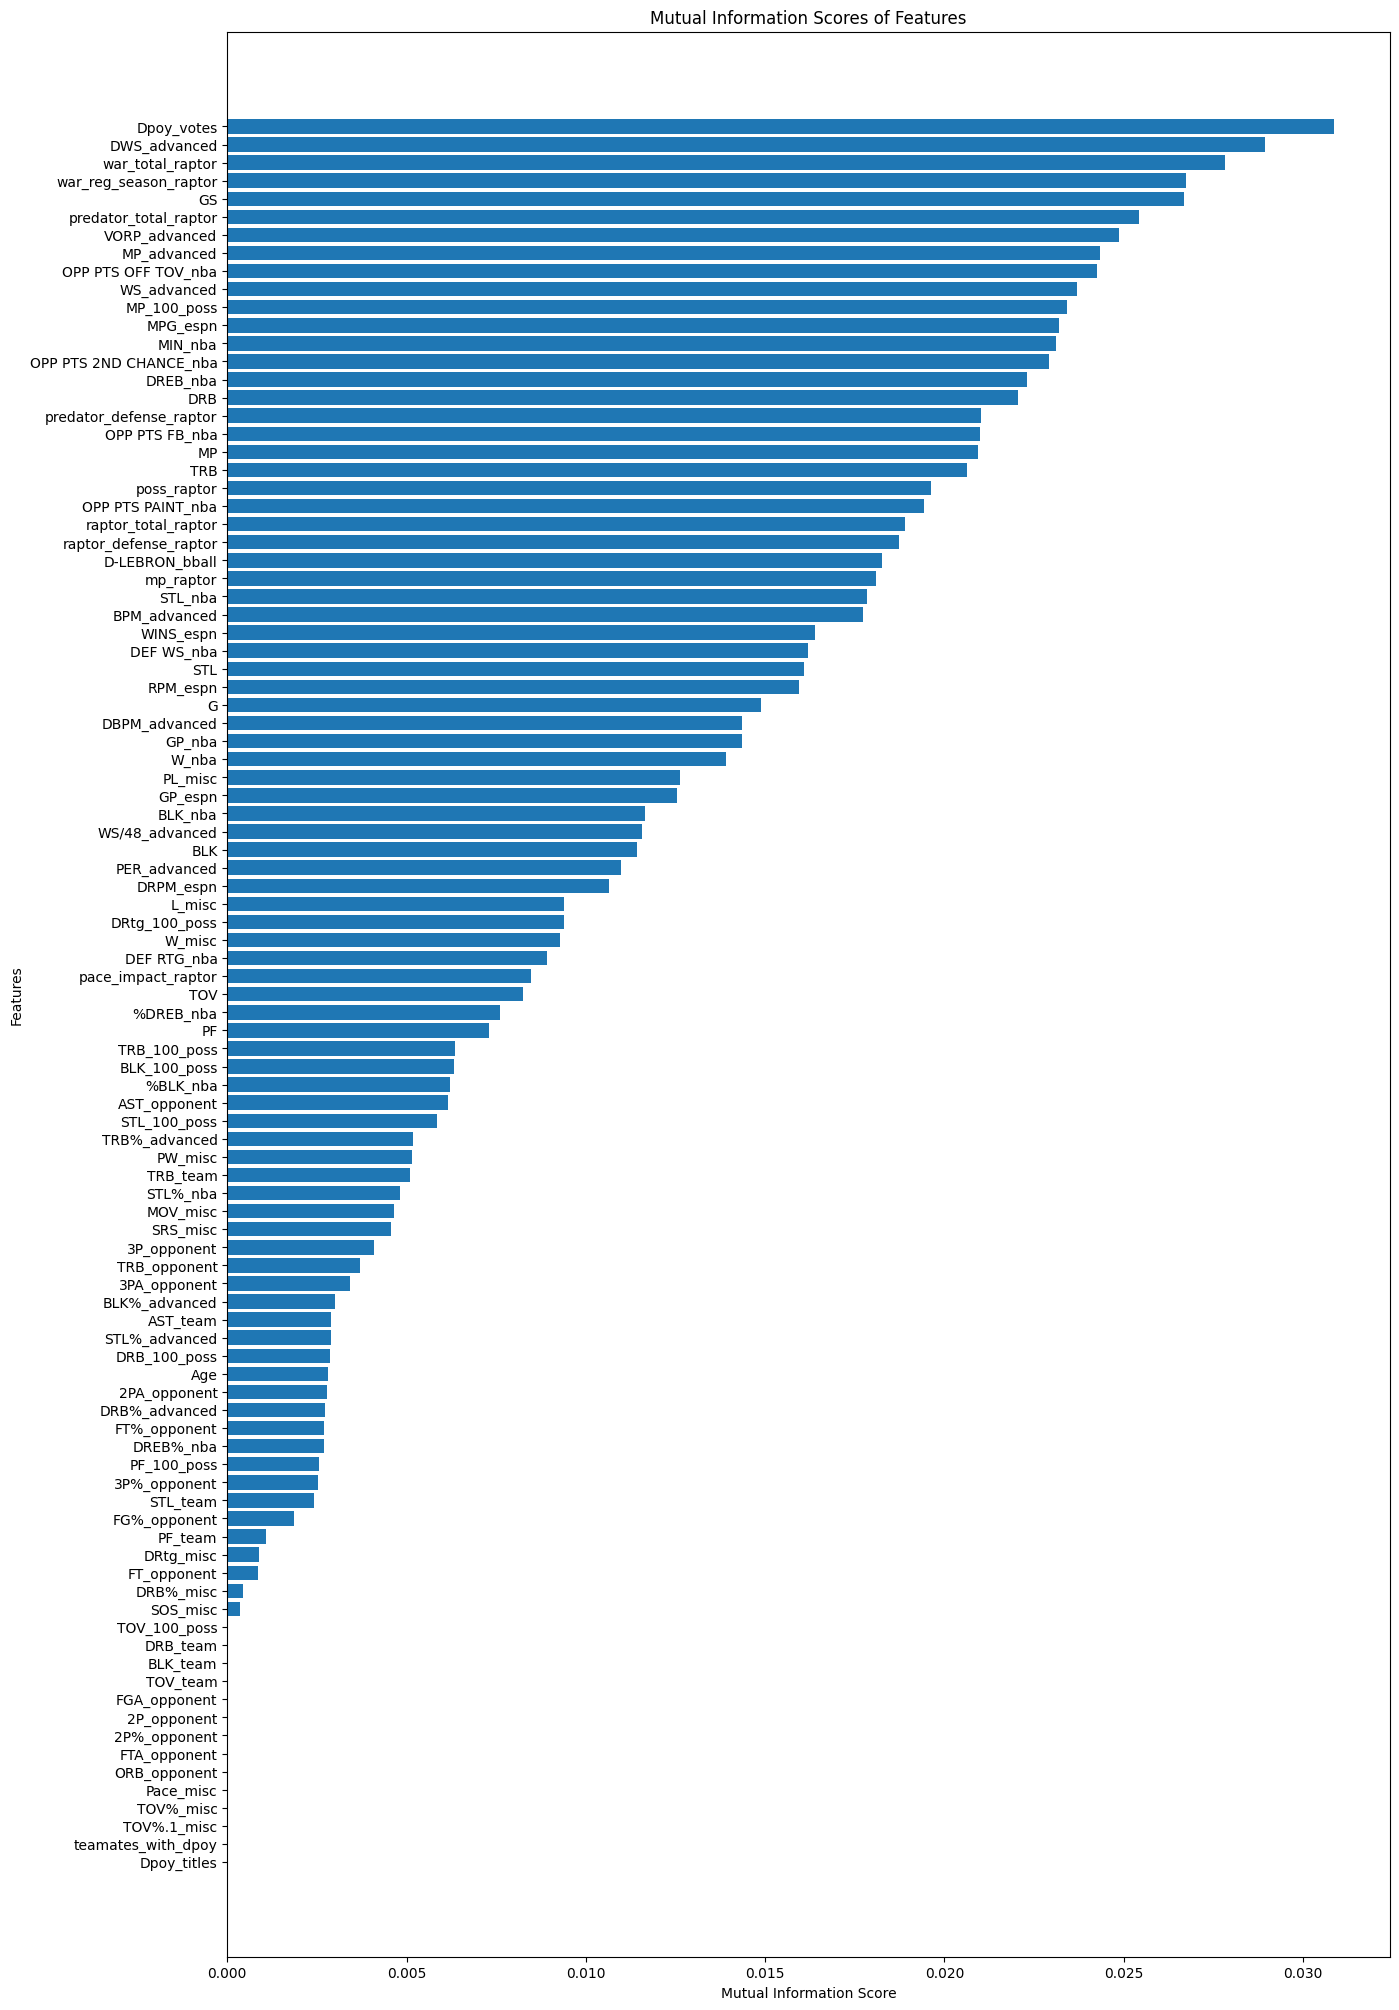

In [15]:
show_mutual_info(subset_2013_2017,"2013_2017")

DataFrame does not contain missing values or empty strings/spaces.


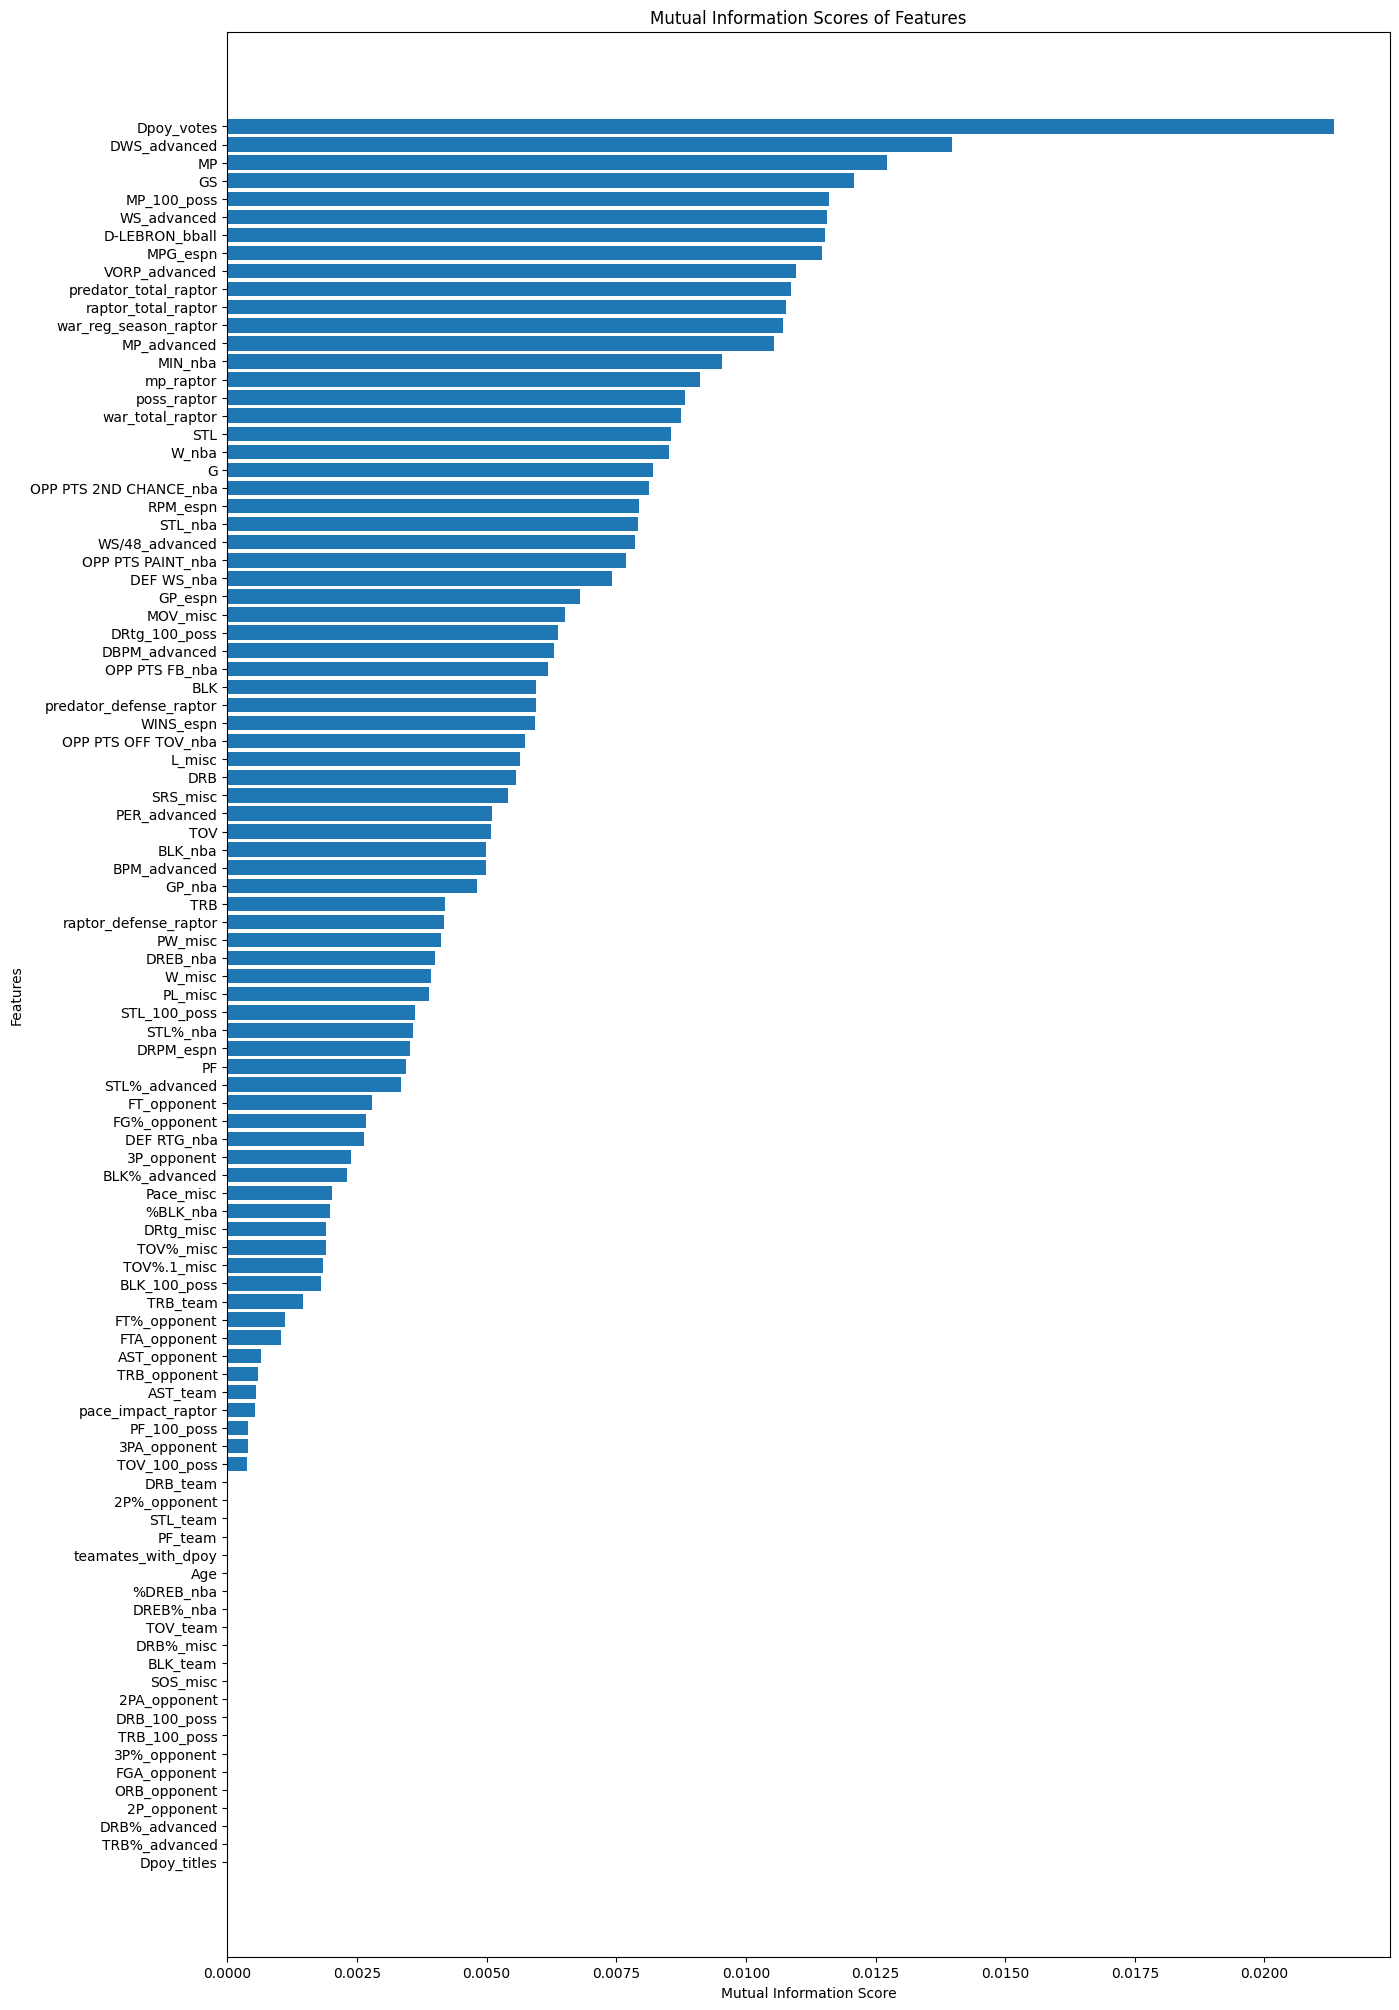

In [16]:
show_mutual_info(subset_2018_2023,"2018_2023")